# Implementation and performance measurement of different algorithm

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load given dataset
data = p.read_csv("diabetes.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [6]:
data["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.duplicated().sum()

1256

In [9]:
df = data.dropna()

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.shape

(2000, 9)

In [12]:
data.corr().describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.209780,0.300468,0.246790,0.242635,0.247865,0.287343,0.203099,0.237498,0.291608
std,0.352336,0.289207,0.292610,0.339853,0.330445,0.292981,0.307579,0.350504,0.291131
min,-0.076600,0.062368,0.051331,-0.111034,-0.085879,0.019475,-0.025453,-0.111034,0.075958
25%,-0.025453,0.123243,0.087384,0.062368,0.087384,0.125719,0.051331,0.026569,0.120924
50%,0.120405,0.226864,0.149672,0.178299,0.192719,0.226864,0.125719,0.236509,0.224437
75%,0.224437,0.320371,0.238375,0.393760,0.320371,0.281545,0.178299,0.254496,0.276726
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [15]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [16]:
X = data.drop(labels='Outcome', axis=1)
#Response variable
y = data.loc[:,'Outcome']    

In [17]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression :

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression(random_state = 12345)

logR.fit(X_train,y_train)

predictLR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictLR))
x = (accuracy_score(y_test,predictLR)*100)


cm2=confusion_matrix(y_test,predictLR)
print('Confusion Matrix result of Logistic Regression is:\n',cm2)
print("")
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )
print("")
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Mean Accuracy result of Logistic Regression is:",accuracy.mean() * 100)


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       395
           1       0.70      0.61      0.66       205

    accuracy                           0.78       600
   macro avg       0.76      0.74      0.75       600
weighted avg       0.78      0.78      0.78       600

Confusion Matrix result of Logistic Regression is:
 [[342  53]
 [ 79 126]]

Sensitivity :  0.8658227848101265

Specificity :  0.6146341463414634

Cross validation test results of accuracy:
[0.7625 0.785  0.785  0.75   0.8075]

Mean Accuracy result of Logistic Regression is: 77.8


# Performance metrics of Logistic Regression:

True Positive : 126
True Negative : 79
False Positive : 53
False Negative : 342

True Positive Rate : 0.2692307692307692
True Negative Rate : 0.5984848484848485
False Positive Rate : 0.4015151515151515
False Negative Rate : 0.7307692307692307

Positive Predictive Value : 0.7039106145251397
Negative predictive value : 0.1876484560570071
[[342  53]
 [ 79 126]]


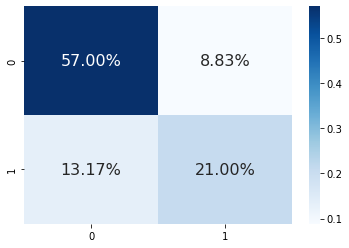

In [19]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


cm2=confusion_matrix(y_test, predictLR)
print(cm2)
sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)
plt.show()

# Support Vector Machines:

In [20]:
from sklearn.svm import SVC

s = SVC(C=20,kernel='rbf')

s.fit(X_train,y_train)

predicts = s.predict(X_test)

print("")
print('Classification report of Support Vector Machines Results:')
print("")

print(classification_report(y_test,predicts))
x = (accuracy_score(y_test,predicts)*100)


cm2=confusion_matrix(y_test,predicts)
print('Confusion Matrix result of Support Vector Machines is:\n',cm2)
print("")
sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(s, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Mean Accuracy result of Support Vector Machine is:",accuracy.mean() * 100)



Classification report of Support Vector Machines Results:

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       395
           1       0.85      0.81      0.83       205

    accuracy                           0.89       600
   macro avg       0.88      0.87      0.87       600
weighted avg       0.89      0.89      0.89       600

Confusion Matrix result of Support Vector Machines is:
 [[365  30]
 [ 38 167]]

Sensitivity :  0.9240506329113924

Specificity :  0.8146341463414634

Cross validation test results of accuracy:
[0.77   0.7975 0.8175 0.7425 0.8075]

Mean Accuracy result of Support Vector Machine is: 78.7


# Performance metrics of Support vector Machine:

True Positive : 167
True Negative : 38
False Positive : 30
False Negative : 365

True Positive Rate : 0.31390977443609025
True Negative Rate : 0.5588235294117647
False Positive Rate : 0.4411764705882353
False Negative Rate : 0.6860902255639098

Positive Predictive Value : 0.8477157360406091
Negative predictive value : 0.09429280397022333
Confusion matrix-SVM:
[[365  30]
 [ 38 167]]


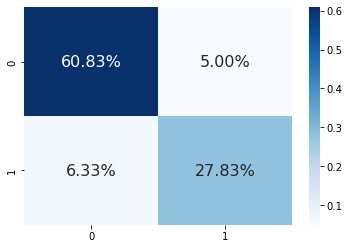

In [21]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

cm2=confusion_matrix(y_test, predicts)
print('Confusion matrix-SVM:')
print(cm2)
# plot_confusion_matrix(cm2)
sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)
plt.show()

# Decision Tree Classifier :

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()

DT.fit(X_train,y_train)

predictDT = DT.predict(X_test)

print("")
print('Classification report DecisionTree classifier Results:')
print("")
print(classification_report(y_test,predictDT))

print("")
x = (accuracy_score(y_test,predictDT)*100)


print('Accuracy result of Random Forest is:', x)

cm2=confusion_matrix(y_test,predictDT)
print('\nConfusion Matrix result of DecissionTree Classifier is:\n',cm2)
print("")
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )
print("")
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)
print("")

accuracy = cross_val_score(DT, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of DecisionTree Classifier is:",accuracy.mean() * 100)
dt=accuracy.mean() * 100



Classification report DecisionTree classifier Results:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       395
           1       0.97      0.92      0.94       205

    accuracy                           0.96       600
   macro avg       0.96      0.95      0.96       600
weighted avg       0.96      0.96      0.96       600


Accuracy result of Random Forest is: 96.16666666666667

Confusion Matrix result of DecissionTree Classifier is:
 [[389   6]
 [ 17 188]]

Sensitivity :  0.9848101265822785

Specificity :  0.9170731707317074

Cross validation test results of accuracy:
[0.9975 0.99   1.     0.97   1.    ]

Accuracy result of DecisionTree Classifier is: 99.14999999999999


# Performance metrics of Decision Tree:

True Positive : 188
True Negative : 17
False Positive : 6
False Negative : 389

True Positive Rate : 0.32582322357019067
True Negative Rate : 0.7391304347826086
False Positive Rate : 0.2608695652173913
False Negative Rate : 0.6741767764298093

Positive Predictive Value : 0.9690721649484536
Negative predictive value : 0.04187192118226601
[[389   6]
 [ 17 188]]


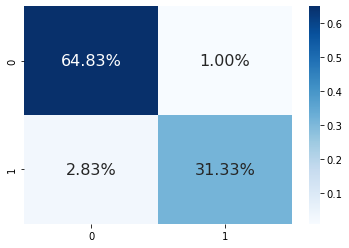

In [23]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


cm2=confusion_matrix(y_test, predictDT)
print(cm2)
sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)
plt.show()

# Random Forest:

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

predictR = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")

print(classification_report(y_test,predictR))
x = (accuracy_score(y_test,predictR)*100)

print('Accuracy result of Random Forest is:', x)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Mean Accuracy result of Random Forest is:",accuracy.mean() * 100)
RFC=accuracy.mean() * 100


Classification report of Random Forest Results:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       395
           1       0.97      0.97      0.97       205

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

Accuracy result of Random Forest is: 97.83333333333334

Confusion Matrix result of Random Forest is:
 [[389   6]
 [  7 198]]

Sensitivity :  0.9848101265822785

Specificity :  0.9658536585365853

Cross validation test results of accuracy:
[1.    1.    1.    0.965 1.   ]

Mean Accuracy result of Random Forest is: 99.3


# Performance metrics of Random Forest:

True Positive : 198
True Negative : 7
False Positive : 6
False Negative : 389

True Positive Rate : 0.3373083475298126
True Negative Rate : 0.5384615384615384
False Positive Rate : 0.46153846153846156
False Negative Rate : 0.6626916524701874

Positive Predictive Value : 0.9705882352941176
Negative predictive value : 0.017676767676767676
Confusion matrix-RF:
[[389   6]
 [  7 198]]


<AxesSubplot:>

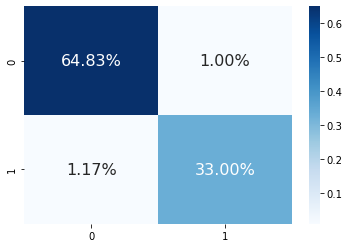

In [25]:
TN = cm1[1][0]
FN = cm1[0][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-RF:')
print(cm2)
sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)


In [26]:
#selection Random forest classifier for deployment since it has the highest mean accuracy
import joblib 
joblib.dump(rfc, 'RF.pkl') 

['RF.pkl']

In [28]:
print(rfc.predict([['0','84','82','31','125','38.2','0.233','23']]))

[0]
